In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'face-mask-dataset' dataset.
Path to dataset files: /kaggle/input/face-mask-dataset


In [7]:
import os

# List the contents of the downloaded dataset directory
print(f"Contents of the dataset directory '{path}':")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

Streaming output truncated to the last 5000 lines.
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3801.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_501.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1782.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2493.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_827.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2944.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1969.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2327.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3579.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_423.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1770.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1580.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2897.jpg
/kaggle/input/fa

In [8]:
!ls

'archive (1).zip'   sample_data


Importing the dependencies

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
with_mask_path = os.path.join(path, 'data', 'with_mask')
without_mask_path = os.path.join(path, 'data', 'without_mask')

with_mask_images = os.listdir(with_mask_path)
without_mask_images = os.listdir(without_mask_path)

print(f"Number of images with mask: {len(with_mask_images)}")
print(f"Number of images without mask: {len(without_mask_images)}")

Number of images with mask: 3725
Number of images without mask: 3828


In [12]:
#create labels for images

with_mask_labels = [1]*len(with_mask_images)
without_mask_labels = [0]*len(without_mask_images)



In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels = with_mask_labels + without_mask_labels
images = with_mask_images + without_mask_images

print(labels[0:5])
print(images[0:5])

[1, 1, 1, 1, 1]
['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']


Displaying the images

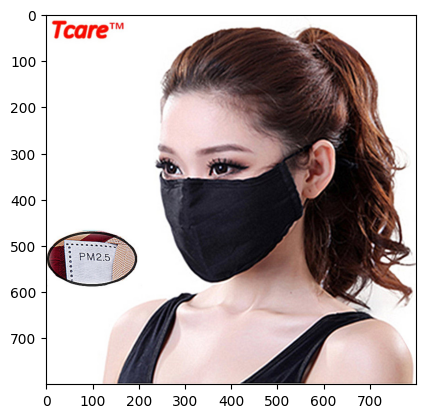

In [15]:
#displaying with mask image

img = mpimg.imread(os.path.join(with_mask_path, images[0]))
imgplot = plt.imshow(img)
plt.show()

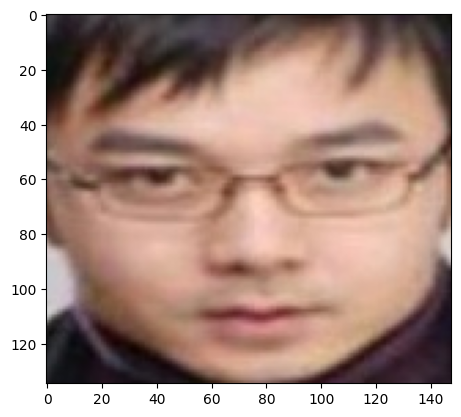

In [18]:
#displaying without mask image

img = mpimg.imread(os.path.join(without_mask_path, without_mask_images[0]))
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [21]:
#resize the images
#convert images to numpy arrays

with_mask_link = with_mask_path # Corrected path

data = []

for img_file in with_mask_images:
  image = Image.open(os.path.join(with_mask_link, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(np.array(image))


without_mask_link = without_mask_path

for img_file in without_mask_images:
  image = Image.open(os.path.join(without_mask_link, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(np.array(image))

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

In [25]:
data[0].shape

(128, 128, 3)

In [27]:
from re import X
#converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [29]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
#scalling the data
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
#compile the neural network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
from IPython.core import history
#training the neural network

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8374 - loss: 0.2841 - val_acc: 0.6936 - val_loss: 0.7573
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8294 - loss: 0.2716 - val_acc: 0.7578 - val_loss: 0.7562
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8415 - loss: 0.1947 - val_acc: 0.7823 - val_loss: 0.6696
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8523 - loss: 0.1474 - val_acc: 0.8273 - val_loss: 0.5139
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8547 - loss: 0.0912 - val_acc: 0.7373 - val_loss: 0.7897
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8325 - loss: 0.1165 - val_acc: 0.8332 - val_loss: 0.5003
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8661 - loss: 0.0755 - val_acc: 0.7743 - val_loss: 0.6476
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8428 - loss: 0.0707 - val_acc: 0.7690 - val_loss: 0.5936
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy :', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7902 - loss: 0.7022
Test Accuracy : 0.7849106788635254


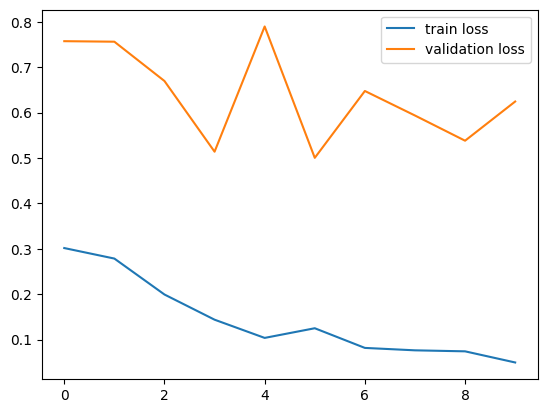

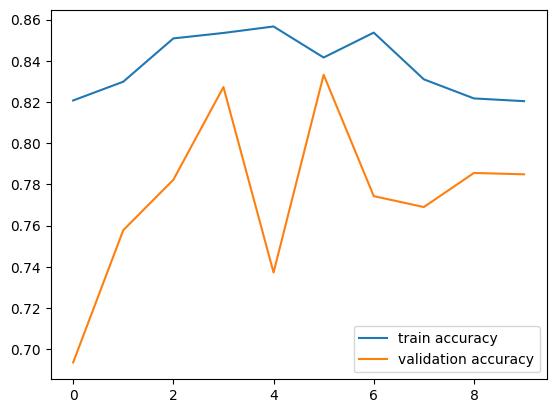

In [44]:
h = history

#plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive system

Enter the path of the image: /content/mask_man.jpg


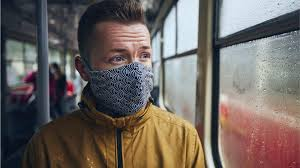

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
[[0.9773492 0.7406808]]
The person in the image is wearing a mask


In [45]:
input_image_path = input("Enter the path of the image: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")